<h1>Задание 1<h1>

In [453]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [454]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


<h2>Задача 1.1 (0.5 балла) Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.<h2>

In [455]:
print('Размер до удаления объектов с пропущенными значениями:', X.shape)
X_full = X.dropna(axis=0)
print('Размер после удаления объектов с пропущенными значениями:', X.shape)
X_full.head()

Размер до удаления объектов с пропущенными значениями: (178, 13)
Размер после удаления объектов с пропущенными значениями: (178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [456]:
cat_features_mask = (X.dtypes == "object").values
X_dum = pd.get_dummies(X_full, drop_first=True)
X_dum.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


<h2>Задача 1.2 (0.5 балла) Используя функцию train_test_split(), разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать np.random.seed() для воспроизводимости результатов.<h2>

In [6]:
from sklearn.model_selection import train_test_split
X_arr = X_dum.values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_arr, y, test_size=0.3, random_state=np.random.seed())

<h2>Задача 1.3 (1 балл) На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр n_neighbours класса KNeighborsClassifier). Для обучения используйте только два признака: alcohol и magnesium – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля StandardScaler.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.<h2>

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

In [457]:
normalizer = preprocessing.StandardScaler() # нормализуем данные
X_norm_train = normalizer.fit_transform(X_train)
X_norm_test = normalizer.transform(X_test)
X_norm_train_end = X_norm_train[:, [0,4]]
X_norm_test_end = X_norm_test[:, [0,4]]

In [458]:
naighbors = [1, 3, 5, 10, 15, 25]
clfs = []
print('NN\t\tTrain\tTest')
for i in naighbors:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_norm_train_end, y_train)
    clfs.append(clf)
    print(str(i) + '\t\t%.2f\t%.2f' % (np.mean(y_train==clf.predict(X_norm_train_end)),
                                       np.mean(y_test==clf.predict(X_norm_test_end))))

NN		Train	Test
1		1.00	0.65
3		0.78	0.78
5		0.77	0.78
10		0.77	0.76
15		0.70	0.76
25		0.69	0.70


<h2>Задача 1.5 (1 балл) Библиотека mlxtend позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите документацию библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.<h2>

In [459]:
from mlxtend.plotting import plot_decision_regions
from matplotlib.gridspec import GridSpec
from itertools import product

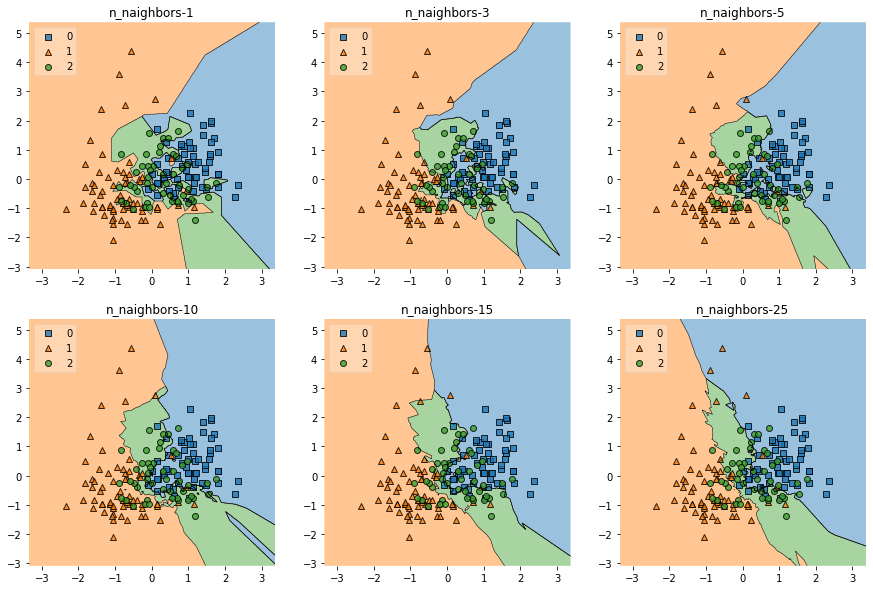

In [460]:
fig = plt.figure(figsize=(15,10))
gs = GridSpec(ncols=3, nrows=2, figure=fig)
X_plt = np.vstack([X_norm_train_end, X_norm_test_end])
y_plt = np.hstack([y_train, y_test])
labels = ['n_naighbors-' + str(i) for i in naighbors]
for clf, lab, grd in zip(clfs, labels, list(product([0, 1, 2], repeat=2))[:6]):

    clf.fit(X_plt, y_plt)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_plt, y=y_plt, clf=clf, legend=2)
    plt.title(lab)

plt.show()

<h2>Задача 1.6 (0.5 балла) Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.<h2>

Наиболее точный результат даёт 1 ближайший сосед, но данный классификатор просто запомнил выборку и не обладает обобщающей способностью, что очень плохо. 15 и 25 ближайших соседей показывают плохие результаты по сравнению с другими, и, на мой взгляд, для такой маленькой выборки эти параметры слишком большие, что искажает правильность классификации. Наиболее оптимальным выбором будет взять 5 или 10. С данными параметрами классификаторы имеют похожие решающие поверхности и примерно одинаковую долю правильных ответов на обучающей выборке.

<h1>Задание 2<h1>

<h2>Задача 2.1 (1.5 балла) Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:

Определите атрибуты trajectory (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и knn (обученный kNN классификатор, который по позиции метки предсказывает её класс).
Определите метод move(): рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, np.random.binomial() с правильными параметрами.<h2>

In [461]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Attributes:
        ------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''
        # Store the history of movements
        self.trajectory = np.array([np.array(initial_position)])
        
        # kNN Classifier for determining the classes of landmarks
        self.knn = KNeighborsClassifier(k)
        self.knn.fit(landmarks, classes)
        
        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
    def move(self):
        '''
        Calculate new position of the robot and add it to the history
        '''
        if np.random.binomial(1, 0.2):
            self.trajectory = np.vstack([self.trajectory,
                                       (self.trajectory[-1] + self.mapping[0])])
        else:
            self.trajectory = np.vstack([self.trajectory,
                                        self.trajectory[-1] + self.mapping[self.knn.predict(self.trajectory[-1].reshape(1, -1))[0]]])
        

<h2>Задача 2.2 (0.5 балла) Дополните функцию conduct_experiment: определите переменную traj так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.<h2>

In [462]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
    
    fig, ax = plt.subplots(figsize = (10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    
    traj = robot.trajectory
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()

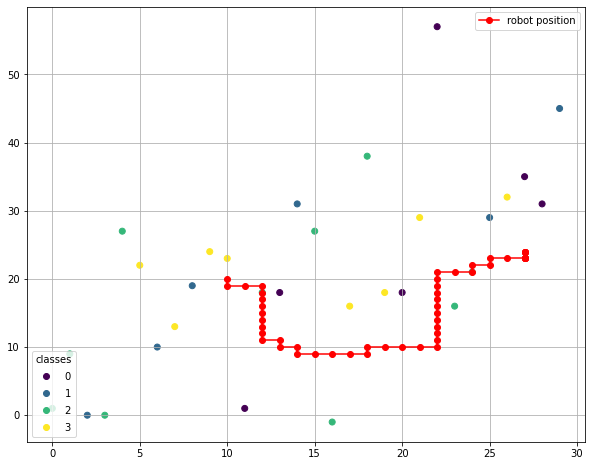

In [463]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

<h2>Задача 2.3 (1 балл) Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно?<h2>

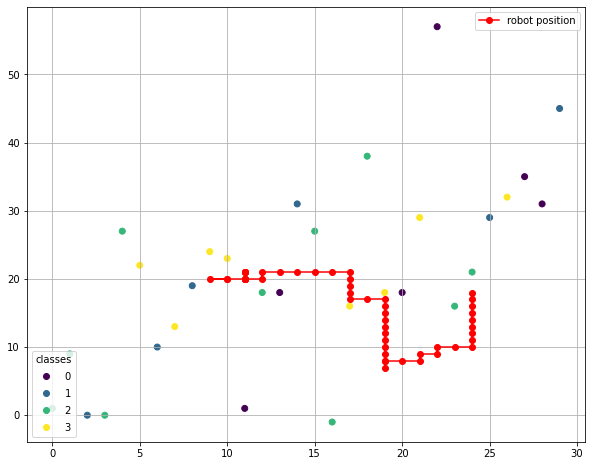

In [464]:
conduct_experiment(x, mean = 3, std = 10, k = 1, n_movements = 50)

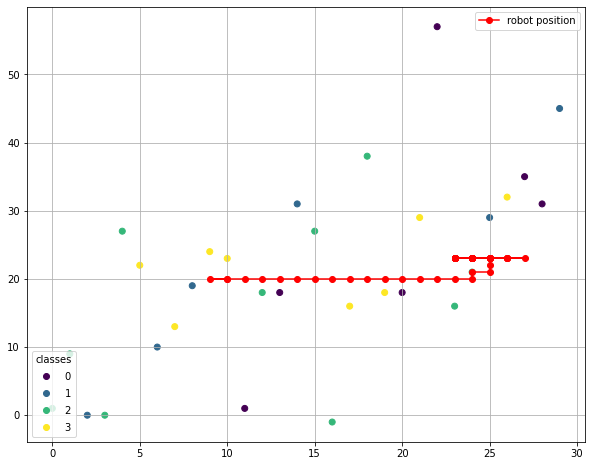

In [465]:
conduct_experiment(x, mean = 3, std = 10, k = 2, n_movements = 50)

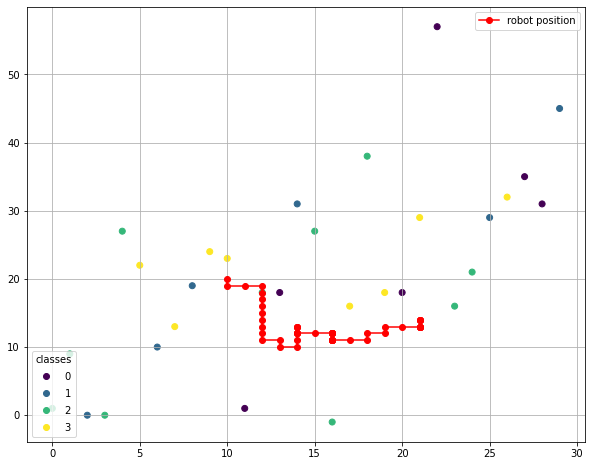

In [466]:
conduct_experiment(x, mean = 3, std = 10, k = 15, n_movements = 50)

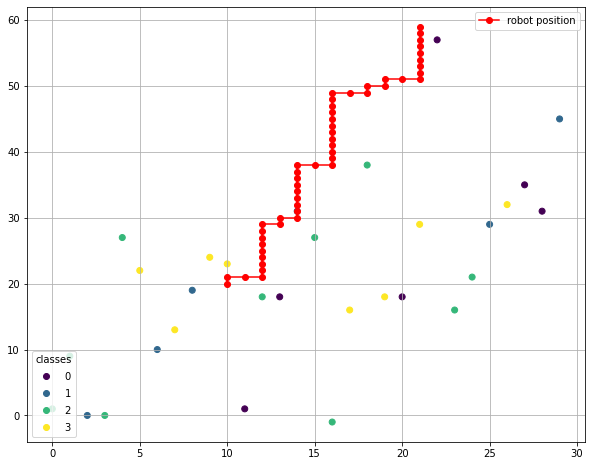

In [467]:
conduct_experiment(x, mean = 3, std = 10, k = len(x), n_movements = 50)

Число соседей в 80% случаях определяет движение робота. Если взять все элементы, то робот в 80% случаях будет двигаться в одном и том же направлении. Следовательно, k - очень сильно влияет на траекторию. Если бы мы выбирали метки классов осмысленно, то мы бы задавали основное направление движения. 

<h1>Задание 3<h1>

<h2>Задача 3.1 (0.1 балла) Есть ли в наборе данных пропущенные значения? Если да, удалите их.<h2>

In [468]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [469]:
print('Размер до удаления объектов с пропущенными значениями:', data.shape)
data_full = data.dropna(axis=0)
print('Размер после удаления объектов с пропущенными значениями:', data.shape)
data_full.head()

Размер до удаления объектов с пропущенными значениями: (53940, 11)
Размер после удаления объектов с пропущенными значениями: (53940, 11)


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<h2>Задача 3.2 (0.1 балла) Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.<h2>

In [470]:
data_full.drop(columns=['Unnamed: 0'], inplace=True)
data_full.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<h2>Задача 3.3 (0.1 балла) Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет k + 1 строка, где k – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?<h2>

In [471]:
data_full.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [472]:
float_mask = (data_full.dtypes == 'float64')
int_mask = (data_full.dtypes == 'int64')
float_data = data_full[data_full.columns[float_mask | int_mask]]
float_data.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [473]:
float_data.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [474]:
import seaborn as sns

<AxesSubplot:>

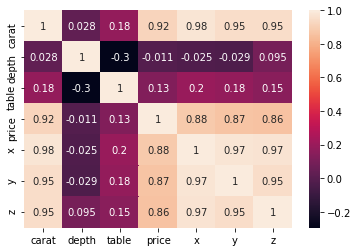

In [475]:
sns.heatmap(float_data.corr(), annot=True)

Больше всего цена зависит от carat, x, y, z.

<h2>Задача 3.4 (0.1 балла) Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.<h2>

In [476]:
data_dum = pd.get_dummies(data=data_full, drop_first=True)
data_dum.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0


<h2>Задача 3.5 (0.2 балла) Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.<h2>

In [477]:
train_mask = data_dum.columns[data_dum.columns != 'price']
X_d_train, X_d_test, y_d_train, y_d_test = train_test_split(data_dum[train_mask], data_dum['price'], test_size=0.3)

<h2>Задача 3.6 (0.3 балла) Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении X1 на 1,y увеличивается на w1"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля StandardScaler.<h2>

In [478]:
scaler = preprocessing.StandardScaler()
X_d_norm_train = scaler.fit_transform(X_d_train)
X_d_norm_test = scaler.transform(X_d_test)

<h2>Задача 3.7 (0.2 балла) Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.<h2>

In [479]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [480]:
lr = LinearRegression().fit(X_d_norm_train, y_d_train)

In [481]:
print ("Train: {}".format(mean_squared_error(y_d_train, lr.predict(X_d_norm_train))))
print ("Test: {}".format(mean_squared_error(y_d_test, lr.predict(X_d_norm_test))))

Train: 1267634.6753225848
Test: 1300722.3768764222


<h2>Задача 3.8 (0.2 балла) Изучите документацию модуля LinearRegression и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.<h2>

In [482]:
lr.score(np.vstack([X_d_norm_train, X_d_norm_test]), np.hstack([y_d_train, y_d_test])) #коф. детерминации на всей выборке

0.9197276691344431

In [496]:
lr.score(X_d_norm_test, y_d_test) #коф. детерминации на тестовой выборке

0.9167065436610036

Модель очень хорошо аппроксимирует данные, так как коф. детерминации близок к 1.

In [499]:
print(*zip(lr.coef_, data_dum.columns[data_dum.columns != 'price']), sep='\n')

(5413.433271864592, 'carat')
(-97.30262328764205, 'depth')
(-64.45974845975044, 'table')
(-1238.9450966913923, 'x')
(44.52101179762081, 'y')
(-25.5893991444254, 'z')
(163.03789738248727, 'cut_Good')
(403.0763445268734, 'cut_Ideal')
(326.924479622436, 'cut_Premium')
(297.5658635222964, 'cut_Very Good')
(-77.25476463355598, 'color_E')
(-106.72870989667959, 'color_F')
(-200.02478793102, 'color_G')
(-353.978216322578, 'color_H')
(-445.087206984139, 'color_I')
(-529.5052281831303, 'color_J')
(948.9893141921902, 'clarity_IF')
(1535.2501940026318, 'clarity_SI1')
(977.0224308126609, 'clarity_SI2')
(1615.321343052688, 'clarity_VS1')
(1753.7838994095453, 'clarity_VS2')
(1231.7170957327717, 'clarity_VVS1')
(1437.54540377246, 'clarity_VVS2')


Как можно заметить, у 'carat' и 'x' коэффициенты по модулю на порядок больше. Сильнее всего вклад в цену даёт 'carat', а 'x' очень сильно уменьшает цену, т. к. его коэффициент - отрицательный.

<h2>Задача 3.9 (0.4 балла) Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули Lasso и Ridge из sklearn. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.<h2>

In [500]:
from sklearn.linear_model import Lasso, Ridge

In [501]:
lasso = Lasso(alpha=10).fit(X_d_norm_train, y_d_train)
ridge = Ridge(alpha=10).fit(X_d_norm_train, y_d_train)

In [509]:
print('Коф. детерминации Lasso на тестовых данных:', lasso.score(X_d_norm_test, y_d_test))
print('Коф. детерминации Ridge на тестовых данных:', ridge.score(X_d_norm_test, y_d_test))

Коф. детерминации Lasso на тестовых данных: 0.9125573444091991
Коф. детерминации Ridge на тестовых данных: 0.9167420745024188


Как можно заметить, на Lasso коф. детерминации меньше чем у Linear regression. Следовательно, ожидаем меньшую точность на тестовой выборке. У Ridge этот коф. чуть больше чем у Linear regression.

In [510]:
print ("Train(Lasso): {}".format(mean_squared_error(y_d_train, lasso.predict(X_d_norm_train))))
print ("Test(Lasso): {}".format(mean_squared_error(y_d_test, lasso.predict(X_d_norm_test))))
print()
print(*zip(lasso.coef_, data_dum.columns[data_dum.columns != 'price']), sep='\n')

Train(Lasso): 1328174.2244325045
Test(Lasso): 1365516.8583417595

(4923.017454483868, 'carat')
(-104.983672291065, 'depth')
(-74.3843983806806, 'table')
(-748.9436304208679, 'x')
(-0.0, 'y')
(-23.843311893024016, 'z')
(44.59179698991, 'cut_Good')
(205.30547531616, 'cut_Ideal')
(145.53520437538995, 'cut_Premium')
(133.51535638111213, 'cut_Very Good')
(-4.074938857435995, 'color_E')
(-38.545782216116386, 'color_F')
(-121.70535384162413, 'color_G')
(-279.6412513234156, 'color_H')
(-372.6083735660796, 'color_I')
(-469.93651621139855, 'color_J')
(630.3815605081348, 'clarity_IF')
(792.6864948620301, 'clarity_SI1')
(333.0791103967197, 'clarity_SI2')
(986.3135505458306, 'clarity_VS1')
(1028.3030705101696, 'clarity_VS2')
(795.3235117250098, 'clarity_VVS1')
(924.7034125294228, 'clarity_VVS2')


In [511]:
print ("Train(Ridge): {}".format(mean_squared_error(y_d_train, ridge.predict(X_d_norm_train))))
print ("Test(Ridge): {}".format(mean_squared_error(y_d_test, ridge.predict(X_d_norm_test))))
print()
print(*zip(ridge.coef_, data_dum.columns[data_dum.columns != 'price']), sep='\n')

Train(Ridge): 1267766.4133562986
Test(Ridge): 1300167.5222392231

(5373.582318348601, 'carat')
(-95.36417824637542, 'depth')
(-64.56301670086539, 'table')
(-1184.4822618141923, 'x')
(31.883538264519665, 'y')
(-29.607972003462503, 'z')
(164.12529024427346, 'cut_Good')
(404.9959991886051, 'cut_Ideal')
(328.3894451346913, 'cut_Premium')
(299.6111904941258, 'cut_Very Good')
(-76.73722563147587, 'color_E')
(-106.48447990290389, 'color_F')
(-199.4729786859888, 'color_G')
(-353.08380062891365, 'color_H')
(-443.71157119488026, 'color_I')
(-528.151714656936, 'color_J')
(936.8765088886215, 'clarity_IF')
(1505.4668842983763, 'clarity_SI1')
(951.7140909485871, 'clarity_SI2')
(1590.4569927703246, 'clarity_VS1')
(1724.904034120206, 'clarity_VS2')
(1214.8871696778006, 'clarity_VVS1')
(1417.4707594016743, 'clarity_VVS2')


In [519]:
#Найдём разницу между коф.
print(np.abs(lasso.coef_ -lr.coef_))
print(np.abs(ridge.coef_ -lr.coef_))

[490.41581738   7.681049     9.92464992 490.00146627  44.5210118
   1.74608725 118.44610039 197.77086921 181.38927525 164.05050714
  73.17982578  68.18292768  78.31943409  74.336965    72.47883342
  59.56871197 318.60775368 742.56369914 643.94332042 629.00779251
 725.4808289  436.39358401 512.84199124]
[39.85095352  1.93844504  0.10326824 54.46283488 12.63747353  4.01857286
  1.08739286  1.91965466  1.46496551  2.04532697  0.517539    0.24422999
  0.55180925  0.89441569  1.37563579  1.35351353 12.1128053  29.7833097
 25.30833986 24.86435028 28.87986529 16.82992605 20.07464437]


<AxesSubplot:xlabel='x', ylabel='carat'>

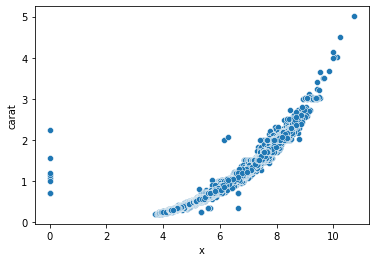

In [552]:
sns.scatterplot(x=data['x'], y=data['carat'])

<AxesSubplot:xlabel='y', ylabel='carat'>

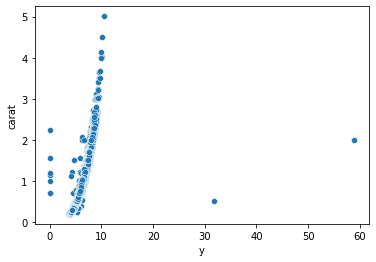

In [555]:
sns.scatterplot(x=data['y'], y=data['carat'])

<AxesSubplot:xlabel='z', ylabel='carat'>

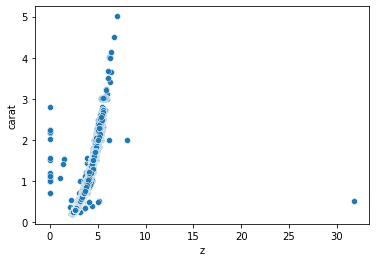

In [556]:
sns.scatterplot(x=data['z'], y=data['carat'])

При Lasso regression веса уменьшились значительно, а в Ridge regression незначительно.

Как видно из графиков у нас есть линецные зависимости в данных, но значение MSE в моделях на тестовой и тренеровочной отличаются несильно, следовательно, мультиколинеарность не помешала моделям обобщить данные.

<h2>Задача 3.10 (0.4 балла) Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции alpha: 0.1, 1, 10, 100, 200 – обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (np.linalg.norm() от вектора оценок коэффициентов) в зависимости от параметра alpha. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.<h2>

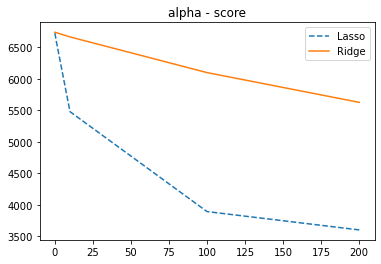

In [530]:
alphas = np.array([0.1, 1, 10, 100, 200])
vec_score_lasso = []
vec_score_ridge = []
for i in alphas:
    vec_score_lasso.append(np.linalg.norm(Lasso(alpha=i).fit(X_d_norm_train, y_d_train).coef_))
    vec_score_ridge.append(np.linalg.norm(Ridge(alpha=i).fit(X_d_norm_train, y_d_train).coef_))

plt.plot(alphas, vec_score_lasso, '--')
plt.plot(alphas, vec_score_ridge)
plt.legend(['Lasso', 'Ridge'])
plt.title('alpha - score')
plt.show()

Lasso regression агрессивнее уменьшает веса, а также может обнулить ненужные веса(как это произошло с 'y', так как его можно выразить по другим признакам). Вот почему Lasso часто используется для отбора признаков.

<h2>Задача 3.11 (0.5 балла) Усредните ошибки для каждого значения alpha (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.<h2>

In [531]:
from sklearn.linear_model import LassoCV

In [547]:
lassoCV = LassoCV(cv=5, alphas=np.arange(1, 100)).fit(X_d_norm_train, y_d_train)

In [548]:
alpha_best = lassoCV.alphas_[lassoCV.mse_path_.mean(axis=1).argmin()]
print('Лучшее значение alpha:', alpha_best)

Лучшее значение alpha: 1


<h2>Задача 3.12 (0.5 балла) Обучите итоговую Lasso-регрессию с выбранным параметром alpha на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.<h2>

In [549]:
final_model = Lasso(alpha=alpha_best).fit(X_d_norm_train, y_d_train)

In [550]:
final_model.coef_

array([ 5365.55192283,   -98.57159243,   -65.59722467, -1153.18396043,
           0.        ,   -23.40966422,   151.94531725,   384.42940211,
         309.19018747,   282.42630648,   -69.90554587,   -99.88291984,
        -192.19575746,  -346.59855386,  -437.84431608,  -523.5418835 ,
         916.94580976,  1460.49903692,   912.15678766,  1552.07899357,
        1680.73365479,  1187.78620517,  1385.93565849])

Наиболее информативный признак - 'carat'. Так же различные 'clarity' являются наиболее информативными. Самыми неинформативнымими признаками являются: 'y', 'z'. Это произошло из-зи того, что эти признаки линейно зависимы.

<h2>Задача 3.13 (0.4 балла) Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.<h2>

In [551]:
print ("Test(Lasso): {}".format(mean_squared_error(y_d_test, final_model.predict(X_d_norm_test))))
print ("Train(Lasso): {}".format(mean_squared_error(y_d_train, final_model.predict(X_d_norm_train))))
print ("Test(Linear regression): {}".format(mean_squared_error(y_d_test, lr.predict(X_d_norm_test))))
print ("Train(Linear regression): {}".format(mean_squared_error(y_d_train, lr.predict(X_d_norm_train))))

Test(Lasso): 1301299.60260813
Train(Lasso): 1268284.0217680584
Test(Linear regression): 1300722.3768764222
Train(Linear regression): 1267634.6753225848


Лучше использовать модель Lasso, так как она, хоть и не на много, но лучше чем Linear regression(из-за меньшей MSE). Она лучше так как убирает линейную зависимость между 'carat', 'x', 'y', 'z'. Зная любой из этих 3, можно узнать 4.